# Task: Classify human activities based on the sensor data

## Part 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

## Read Data

In [2]:
data_main = list()

dum_data = pd.read_csv('total_acc_x_train.txt', header=None, delim_whitespace=True)
data_main.append(dum_data)
dum_data = pd.read_csv('total_acc_y_train.txt', header=None, delim_whitespace=True)
data_main.append(dum_data)
dum_data = pd.read_csv('total_acc_z_train.txt', header=None, delim_whitespace=True)
data_main.append(dum_data)

dum_data = pd.read_csv('body_acc_x_train.txt', header=None, delim_whitespace=True)
data_main.append(dum_data)
dum_data = pd.read_csv('body_acc_y_train.txt', header=None, delim_whitespace=True)
data_main.append(dum_data)
dum_data = pd.read_csv('body_acc_z_train.txt', header=None, delim_whitespace=True)

data_main.append(dum_data)
dum_data = pd.read_csv('body_gyro_x_train.txt', header=None, delim_whitespace=True)
data_main.append(dum_data)
dum_data = pd.read_csv('body_gyro_y_train.txt', header=None, delim_whitespace=True)
data_main.append(dum_data)
dum_data = pd.read_csv('body_gyro_z_train.txt', header=None, delim_whitespace=True)
data_main.append(dum_data)

C:\Users\Rober\AppData\Local\Temp\ipykernel_11188\1424277980.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dum_data = pd.read_csv('total_acc_x_train.txt', header=None, delim_whitespace=True)
C:\Users\Rober\AppData\Local\Temp\ipykernel_11188\1424277980.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dum_data = pd.read_csv('total_acc_y_train.txt', header=None, delim_whitespace=True)
C:\Users\Rober\AppData\Local\Temp\ipykernel_11188\1424277980.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dum_data = pd.read_csv('total_acc_z_train.txt', header=None, delim_whitespace=True)
C:\Users\Rober\AppData\Local\Temp\ipykernel_11188\1424277980.py:10: FutureWarning: The 'delim_whitespace' keyword i

## Data Preprocessing

In [3]:
len(data_main)

9

In [4]:
data_main[0].head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,1.012817,1.022833,1.022028,1.017877,1.023680,1.016974,1.017746,1.019263,1.016417,1.020745,...,1.020981,1.018065,1.019638,1.020017,1.018766,1.019815,1.019290,1.018445,1.019372,1.021171
1,1.018851,1.022380,1.020781,1.020218,1.021344,1.020522,1.019790,1.019216,1.018307,1.017996,...,1.019291,1.019258,1.020736,1.020950,1.020491,1.018685,1.015660,1.014788,1.016499,1.017849
2,1.023127,1.021882,1.019178,1.015861,1.012893,1.016451,1.020331,1.020266,1.021759,1.018649,...,1.020304,1.021516,1.019417,1.019312,1.019448,1.019434,1.019916,1.021041,1.022935,1.022019
3,1.017682,1.018149,1.019854,1.019880,1.019121,1.020479,1.020595,1.016340,1.010611,1.009013,...,1.021295,1.022934,1.022183,1.021637,1.020598,1.018887,1.019161,1.019916,1.019602,1.020735
4,1.019952,1.019616,1.020933,1.023061,1.022242,1.020867,1.021939,1.022300,1.022302,1.022254,...,1.022687,1.023670,1.019899,1.017381,1.020389,1.023884,1.021753,1.019425,1.018896,1.016787


In [5]:
data_main[0].shape

(7352, 128)

In [6]:
data_main[1].shape

(7352, 128)

In [7]:
# make it a 3D aray with featuers
data = np.dstack(data_main)

In [8]:
data.shape

(7352, 128, 9)

In [9]:
# read the target values
y_data = pd.read_csv('y_train.txt', header=None, delim_whitespace=True)

C:\Users\Rober\AppData\Local\Temp\ipykernel_11188\638418738.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_data = pd.read_csv('y_train.txt', header=None, delim_whitespace=True)


In [10]:
y_data.shape

(7352, 1)

In [11]:
y_data.head()

,0
0,5
1,5
2,5
3,5
4,5


In [12]:
y_data.iloc[:, 0].unique()

array([5, 4, 6, 1, 3, 2], dtype=int64)

In [13]:
# Train and test set data
x_train = data[0:6000, :, :]
y_train = y_data [0:6000]

In [14]:
x_test = data[6000:, :, :]
y_test = y_data [6000:]

In [15]:
# one hot encode the y train data
y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

In [16]:
y_train_hot.shape

(6000, 7)

In [17]:
# delete category zero, no such category
y_train_hot = y_train_hot[:, 1:7]
y_test_hot = y_test_hot[:, 1:7]

In [18]:
# get important sizes and dimensions
n_sample = x_train.shape[0]
time_steps = x_train.shape[1]
n_features = x_train.shape[2]
n_outputs = y_train_hot.shape[1]

C:\Users\Rober\AppData\Local\Temp\ipykernel_11188\1147584201.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


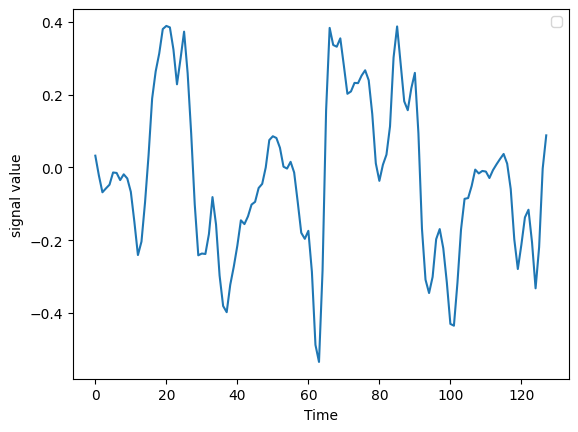

In [19]:
# Visualising some of the signal
test_sample = 150
data_plot = x_train[test_sample, :, 8]
plt.plot(data_plot)
plt.xlabel('Time')
plt.ylabel('signal value')
plt.legend()
plt.show()

## Part 2.  Building the RNN

In [20]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras

In [21]:
# Initialising the RNN
my_classifier = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
my_classifier.add(LSTM(units = 20, return_sequences = True,
                       input_shape = (time_steps, n_features)))
my_classifier.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
#my_classifier.add(LSTM(units = 30, return_sequences = True))
#my_classifier.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
#my_classifier.add(LSTM(units = 20, return_sequences = True))
#my_classifier.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
my_classifier.add(LSTM(units = 20))
my_classifier.add(Dropout(0.2))

# Adding the output layer
my_classifier.add(Dense(units = n_outputs, activation='softmax'))

# Compiling the RNN
my_classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

C:\Users\Rober\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
my_classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128, 20)        │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 20)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20)             │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,806 (22.68 KB)

 Trainable params: 5,806 (22.68 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Fitting the RNN to the Training set
history = my_classifier.fit(x_train, y_train_hot, epochs = 10,
                           batch_size = 32, validation_split=0.1)

Epoch 1/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.3868 - loss: 1.5202 - val_accuracy: 0.6483 - val_loss: 0.8738
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.6273 - loss: 0.8887 - val_accuracy: 0.7267 - val_loss: 0.6511
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7031 - loss: 0.6754 - val_accuracy: 0.7900 - val_loss: 0.5420
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7392 - loss: 0.6038 - val_accuracy: 0.7133 - val_loss: 0.6697
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7732 - loss: 0.5382 - val_accuracy: 0.8433 - val_loss: 0.4495
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.7913 - loss: 0.4902 - val_accuracy: 0.8817 - val_loss: 0.3401
Epoch 7/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8017 - loss: 0.4498 - val_accuracy: 0.8700 - val_loss: 0.3800
Epoch 8/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.8118 - loss: 0.4106 - val_accu

## save the final model

In [24]:
# save the final model
my_classifier.save('sig_classifier.h5')

In [25]:
# to load keras model
from keras.models import load_model
my_classifier = keras.models.load_model("sig_classifier.h5")


## Part 3

In [26]:
# evaluate model
_, accuracy = my_classifier.evaluate(x_test, y_test_hot, batch_size=32)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8936 - loss: 0.4345


In [27]:
# Making the predictions and visualising the results
y_test_pred_hot = my_classifier.predict(x_test)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [28]:
#y_test_pred_hot [ y_test_pred_hot>0.5] = 1
#y_test_pred_hot [ y_test_pred_hot<0.5] = 0

# inverse the "to_categorical"
y_test_pred = np.argmax(y_test_pred_hot, axis=1) + 1

In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

In [30]:
cm

array([[201,   4,   0,   0,   0,   0],
       [  2, 214,   0,   0,   0,   0],
       [  3,   3, 194,   0,   0,   0],
       [  0,   0,   0, 158,  69,   0],
       [  0,   0,   0,  47, 200,   0],
       [  0,   3,  34,   0,   0, 220]], dtype=int64)

In [31]:
# list all the data in history
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Plot the accuracy for both train and validation set

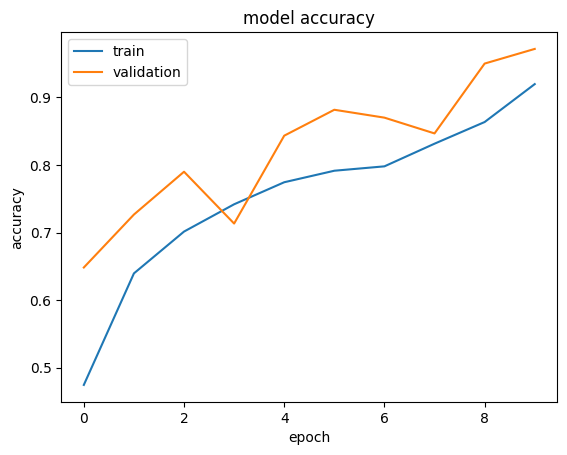

In [32]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

## Plot the loss for both train and validation set

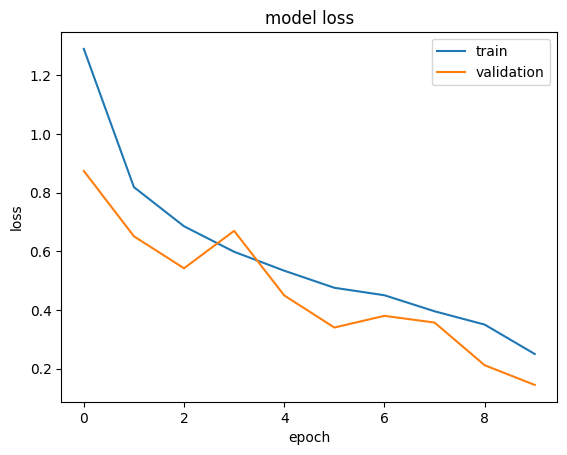

In [33]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

## Add more Layer

In [34]:
# Initialising the RNN
my_classifier = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
my_classifier.add(LSTM(units = 16, return_sequences = True,
                       input_shape = (time_steps, n_features)))
my_classifier.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
my_classifier.add(LSTM(units = 32, return_sequences = True))
my_classifier.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
my_classifier.add(LSTM(units = 16, return_sequences = True))
my_classifier.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
my_classifier.add(LSTM(units = 16))
my_classifier.add(Dropout(0.2))

# Adding the output layer
my_classifier.add(Dense(units = n_outputs, activation='softmax'))

# Compiling the RNN
my_classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

C:\Users\Rober\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
my_classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128, 16)        │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128, 32)        │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 128, 16)        │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 16)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,286 (51.90 KB)

 Trainable params: 13,286 (51.90 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Fitting the RNN to the Training set
history = my_classifier.fit(x_train, y_train_hot, epochs = 10,
                           batch_size = 32, validation_split=0.1)

Epoch 1/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.4227 - loss: 1.4532 - val_accuracy: 0.7033 - val_loss: 0.7543
Epoch 2/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.6547 - loss: 0.8318 - val_accuracy: 0.6650 - val_loss: 0.7719
Epoch 3/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.7226 - loss: 0.6508 - val_accuracy: 0.7783 - val_loss: 0.4435
Epoch 4/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.7517 - loss: 0.5843 - val_accuracy: 0.7483 - val_loss: 0.5021
Epoch 5/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.7656 - loss: 0.5509 - val_accuracy: 0.8200 - val_loss: 0.4800
Epoch 6/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.7862 - loss: 0.4764 - val_accuracy: 0.8217 - val_loss: 0.4726
Epoch 7/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.8153 - loss: 0.4469 - val_accuracy: 0.9250 - val_loss: 0.2851
Epoch 8/10
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.8622 - loss: 0.3715 - val_ac

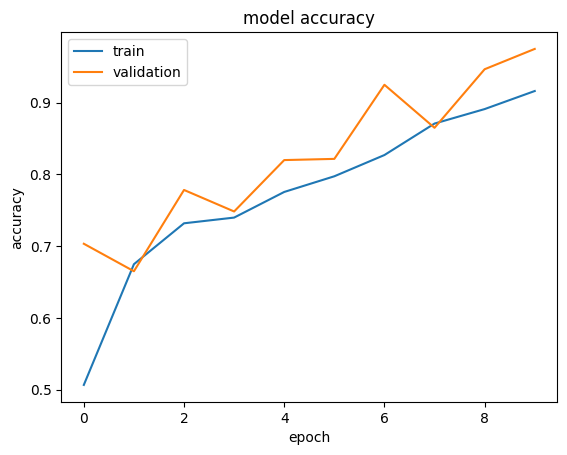

In [37]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

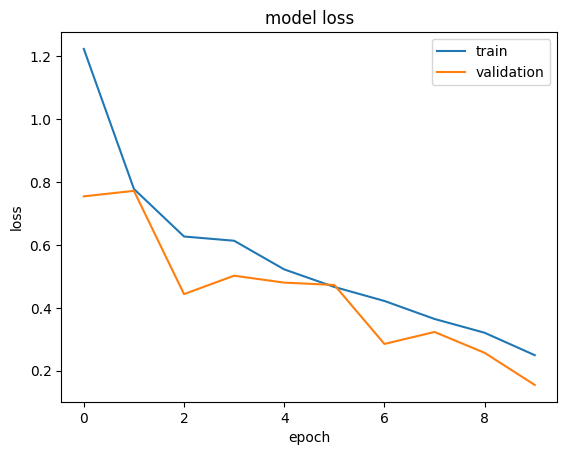

In [38]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

## Any observations?